In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mailbox

## Loading Dataset

In [266]:
mboxfile = "../Data-Email/Mail/All mail Including Spam and Trash.mbox"
mbox = mailbox.mbox(mboxfile)
mbox

In [267]:
type(mbox)

mailbox.mbox

In [268]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
From
To
Subject
MIME-Version
Content-Type
Message-ID
Date
Feedback-ID
X-SES-Outgoing


# Data Transformation
## Data Cleaning

In [269]:
import csv

In [270]:
with open('mailbox.csv', 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','labels','thread'])
    
    for message in mbox:
        writer.writerow([message['Subject'], message['From'], message['Date'], message['To'], message['X-Gmail-Labels'],\
                        message['X-GM-THRID']])

## Reading CSV File

In [271]:
df = pd.read_csv('mailbox.csv')

In [272]:
df.head()

,subject,from,date,to,labels,thread
0,=?UTF-8?Q?=E2=8F=B3_Your_40%_Off_Code_Awaits!?=,EduTap <deepak@edutap.co.in>,"Thu, 2 Sep 2021 13:53:16 +0000",shivambhongade97@gmail.com,"Inbox,Category Updates,Unread",1709798376088298540
1,=?UTF-8?B?UGF5bWVudCBCYW5rcyBQYXJ0IDIg4oCTIEJ1...,"""InvestYadnya"" <hello@investyadnya.in>","Sat, 28 Aug 2021 17:00:24 +0530 (IST)",shivambhongade97@gmail.com,"Inbox,Opened,Category Updates",1709336485730102430
2,=?UTF-8?B?8J+Ri/Cfj7ssIExpdmUgTm934p2X?= You C...,Asmita Patel <connect@asmitapatel.com>,"Sun, 29 Aug 2021 05:01:55 +0000 (UTC)",=?UTF-8?b?4Lqj8J2dnOKVv3bwnZCA4rGu?= <shivambh...,"Inbox,Category Updates,Unread",1709402559677110399
3,The IPO party is far from over,Upstox Daily <upstoxbeta@upstox.com>,"Tue, 31 Aug 2021 18:36:11 +0530 (IST)",shivambhongade97@gmail.com,"Inbox,Category Updates,Unread",1709615106190510477
4,85 killed in Kabul airport carnage by Islamic ...,ET Defence <newsletter@economictimesnews.com>,"Fri, 27 Aug 2021 22:14:53 +0530 (IST)",shivambhongade97@gmail.com,"Inbox,Category Updates,Unread",1709266212459244546


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  9056 non-null   object
 1   from     9125 non-null   object
 2   date     9125 non-null   object
 3   to       9068 non-null   object
 4   labels   9125 non-null   object
 5   thread   9125 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 427.9+ KB


In [274]:
df['date'] = pd.to_datetime(df['date'], utc=True)

In [275]:
df = df[df['date'].notna()]

In [276]:
df.to_csv('gmail.csv')

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9125 entries, 0 to 9124
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  9056 non-null   object             
 1   from     9125 non-null   object             
 2   date     9125 non-null   datetime64[ns, UTC]
 3   to       9068 non-null   object             
 4   labels   9125 non-null   object             
 5   thread   9125 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 499.0+ KB


In [278]:
df.head()

,subject,from,date,to,labels,thread
0,=?UTF-8?Q?=E2=8F=B3_Your_40%_Off_Code_Awaits!?=,EduTap <deepak@edutap.co.in>,2021-09-02 13:53:16+00:00,shivambhongade97@gmail.com,"Inbox,Category Updates,Unread",1709798376088298540
1,=?UTF-8?B?UGF5bWVudCBCYW5rcyBQYXJ0IDIg4oCTIEJ1...,"""InvestYadnya"" <hello@investyadnya.in>",2021-08-28 11:30:24+00:00,shivambhongade97@gmail.com,"Inbox,Opened,Category Updates",1709336485730102430
2,=?UTF-8?B?8J+Ri/Cfj7ssIExpdmUgTm934p2X?= You C...,Asmita Patel <connect@asmitapatel.com>,2021-08-29 05:01:55+00:00,=?UTF-8?b?4Lqj8J2dnOKVv3bwnZCA4rGu?= <shivambh...,"Inbox,Category Updates,Unread",1709402559677110399
3,The IPO party is far from over,Upstox Daily <upstoxbeta@upstox.com>,2021-08-31 13:06:11+00:00,shivambhongade97@gmail.com,"Inbox,Category Updates,Unread",1709615106190510477
4,85 killed in Kabul airport carnage by Islamic ...,ET Defence <newsletter@economictimesnews.com>,2021-08-27 16:44:53+00:00,shivambhongade97@gmail.com,"Inbox,Category Updates,Unread",1709266212459244546


## Data Refactoring

In [279]:
import re

In [280]:
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan

In [281]:
df['from'] = df['from'].apply(lambda x: extract_email_ID(x))

In [282]:
myemail = 'shivambhongade97@gmail.com'
df['label'] = df['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [283]:
df.drop(columns='to', inplace=True)

In [284]:
df.head(10)

,subject,from,date,labels,thread,label
0,=?UTF-8?Q?=E2=8F=B3_Your_40%_Off_Code_Awaits!?=,deepak@edutap.co.in,2021-09-02 13:53:16+00:00,"Inbox,Category Updates,Unread",1709798376088298540,inbox
1,=?UTF-8?B?UGF5bWVudCBCYW5rcyBQYXJ0IDIg4oCTIEJ1...,hello@investyadnya.in,2021-08-28 11:30:24+00:00,"Inbox,Opened,Category Updates",1709336485730102430,inbox
2,=?UTF-8?B?8J+Ri/Cfj7ssIExpdmUgTm934p2X?= You C...,connect@asmitapatel.com,2021-08-29 05:01:55+00:00,"Inbox,Category Updates,Unread",1709402559677110399,inbox
3,The IPO party is far from over,upstoxbeta@upstox.com,2021-08-31 13:06:11+00:00,"Inbox,Category Updates,Unread",1709615106190510477,inbox
4,85 killed in Kabul airport carnage by Islamic ...,newsletter@economictimesnews.com,2021-08-27 16:44:53+00:00,"Inbox,Category Updates,Unread",1709266212459244546,inbox
5,Trades executed at NSE,nse-direct@nse.co.in,2021-09-04 20:46:23+00:00,"Inbox,Category Updates,Unread",1710005561406643722,inbox
6,Top conversations on Sgx Nifty and niftyindica...,notifications@disqus.net,2021-09-03 13:12:03+00:00,"Inbox,Category Updates,Unread",1709886680429191918,inbox
7,Your Profitable Trading =?UTF-8?B?UGxhbuKdlw==...,connect@asmitapatel.com,2021-08-25 06:33:02+00:00,"Inbox,Category Promotions,Unread",1709045904623645449,inbox
8,D-Street rally gets a new trigger | Small- & m...,newsletter@economictimesnews.com,2021-08-30 03:05:49+00:00,"Inbox,Category Updates,Unread",1709486309919395091,inbox
9,CLIENT FUND LEDGER Msg.Id: 03/20210821/WFL/210...,automated.bo@upstox.com,2021-08-22 16:08:29+00:00,"Inbox,Category Updates,Unread",1708810317899261005,inbox


## Refactoring TimeZones

In [285]:
from datetime import datetime
import pytz

# Timezone Change
def refactor_timezone(x):
    est = pytz.timezone('US/Eastern')
    return x.astimezone(est)

df['date'] = df['date'].apply(lambda x: refactor_timezone(x))

# creating week column
week_days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
df['dayofweek'] = df['date'].apply(lambda x: week_days[datetime.weekday(x)])

#creating timeofday column
df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

#creating Hour column
df['hour'] = df['date'].apply(lambda x: x.hour)

#Creating year column
df['year'] = df['date'].apply(lambda x: x.year)

#Creating year column
df['year_int'] = df['date'].apply(lambda x: x.year + x.dayofyear/365.25)

df.index = df['date']
del df['date']

## Data Analysing

- How many emails did I send during a given timeframe?

In [286]:
print(df.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(df.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(df['label'].value_counts())

Thu, 06 Aug 2015 07:34 AM
Mon, 06 Sep 2021 11:37 AM
inbox    8907
sent      218
Name: label, dtype: int64


- At what times of the day do I send and receive emails with Gmail?

In [287]:
sent = df[df['label']=='sent']
received = df[df['label']=='inbox']

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [288]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(df), dtype='bool')
    est = pytz.timezone('US/Eastern')
    
    df[~ind].plot.scatter('year_int', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')

    return ax

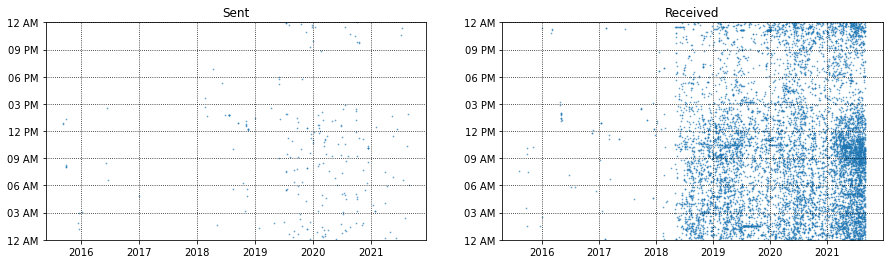

In [289]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

- What is the average number of emails per day and hour?

In [290]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year_int'].notna()]['year_int'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [291]:
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year_int'].notna()]['year_int'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);

In [292]:
class TriplePlot:
    def __init__(self):
        gs = gridspec.GridSpec(6, 6)
        self.ax1 = plt.subplot(gs[2:6, :4])
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False);
        self.ax3 = plt.subplot(gs[:2, :4]) 
        plt.setp(self.ax3.get_xticklabels(), visible=False);

    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
        self.ax2.set_xlabel('Average emails per hour')
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
        self.ax3.set_ylabel('Average emails per day')

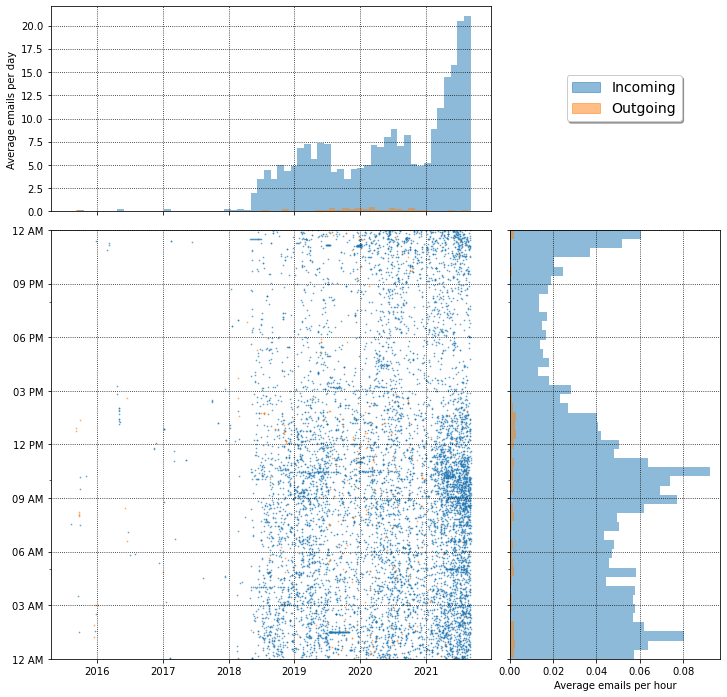

In [293]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

- Number of emails per day

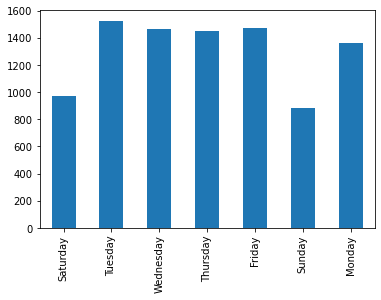

In [294]:
counts = df.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

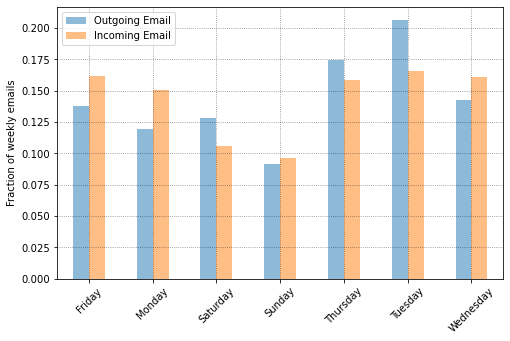

In [295]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

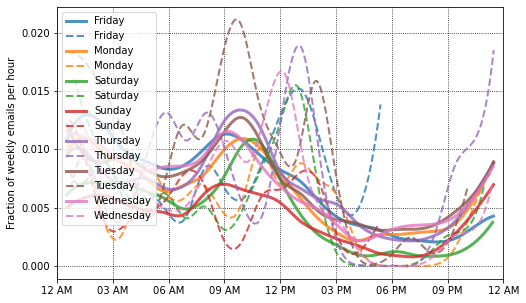

In [296]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(df['dayofweek'].astype('category').cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')

- Most frequently used Words?

In [297]:
from wordcloud import WordCloud 

df_no_arxiv = df[df['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

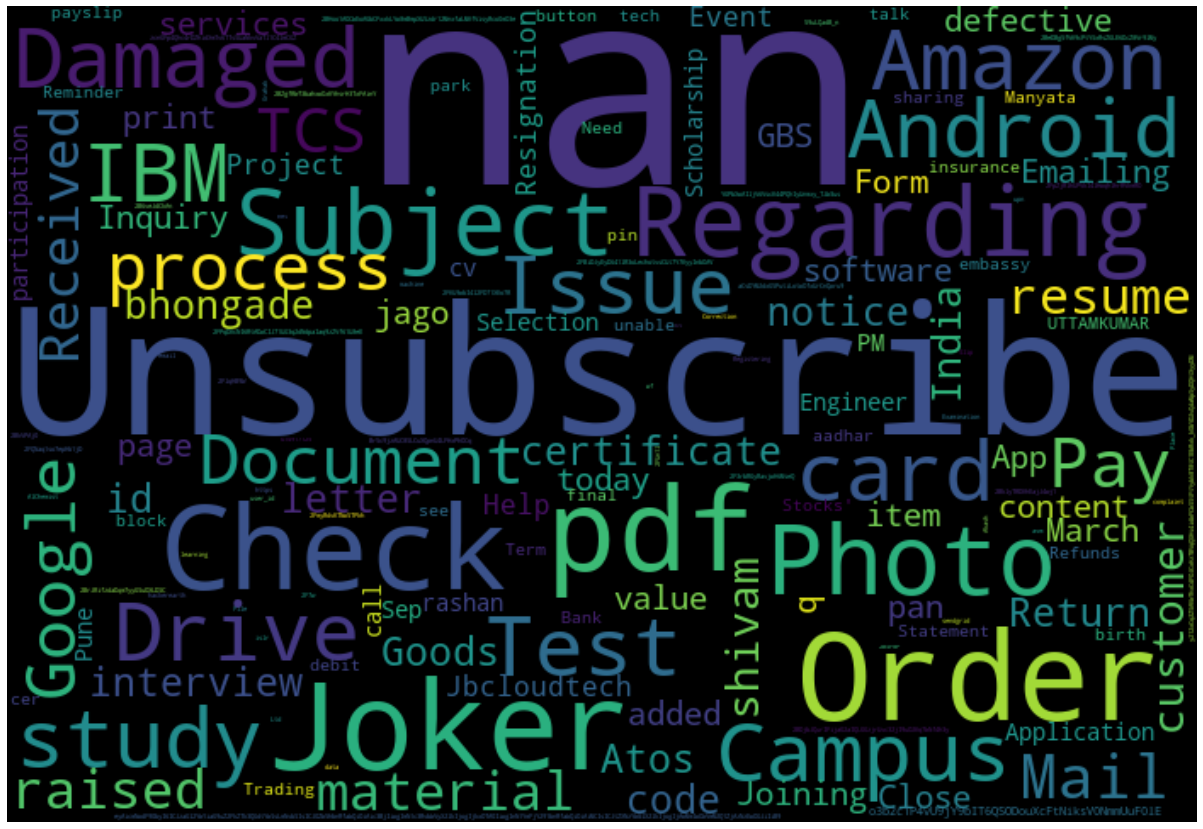

In [298]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)